In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Users
users = pd.read_csv('/Users/sarahberkin/Documents/DataScience/MovieRecommender/ml-1m/users.dat', 
                    sep='::', engine='python', encoding='latin-1',
                    names=['userId', 'gender', 'age', 'occupation', 'zip_code'])

# Create age_group column immediately after loading users
age_bins = [0, 17, 24, 34, 44, 54, 64, 100]
age_labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
users['age_group'] = pd.cut(users['age'], bins=age_bins, labels=age_labels)

# Quick check
print(users.head())

   userId gender  age  occupation zip_code age_group
0       1      F    1          10    48067  Under 18
1       2      M   56          16    70072     55-64
2       3      M   25          15    55117     25-34
3       4      M   45           7    02460     45-54
4       5      M   25          20    55455     25-34


In [3]:
# Load Movies
movies = pd.read_csv('/Users/sarahberkin/Documents/DataScience/MovieRecommender/ml-1m/movies.dat', 
                     sep='::', engine='python', encoding='latin-1',
                     names=['movieId', 'title', 'genres'])

def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    return int(match.group(1)) if match else None

movies['year'] = movies['title'].apply(extract_year)

genre_dummies = movies['genres'].str.get_dummies(sep='|')
movies = pd.concat([movies, genre_dummies], axis=1)

print(movies.head())

   movieId                               title                        genres  \
0        1                    Toy Story (1995)   Animation|Children's|Comedy   
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2        3             Grumpier Old Men (1995)                Comedy|Romance   
3        4            Waiting to Exhale (1995)                  Comedy|Drama   
4        5  Father of the Bride Part II (1995)                        Comedy   

   year  Action  Adventure  Animation  Children's  Comedy  Crime  ...  \
0  1995       0          0          1           1       1      0  ...   
1  1995       0          1          0           1       0      0  ...   
2  1995       0          0          0           0       1      0  ...   
3  1995       0          0          0           0       1      0  ...   
4  1995       0          0          0           0       1      0  ...   

   Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  \
0 

In [7]:
# Load Ratings
ratings = pd.read_csv('/Users/sarahberkin/Documents/DataScience/MovieRecommender/ml-1m/ratings.dat', 
                      sep='::', engine='python', encoding='latin-1',
                      names=['userId', 'movieId', 'rating', 'timestamp'])

print(ratings.head())

   userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


In [9]:
# Merge ratings with users
ratings_users = ratings.merge(users, on='userId', how='left')

# Merge ratings_users with movies
full_data = ratings_users.merge(movies, on='movieId', how='left')

print(full_data.head())
print(full_data.columns)

   userId  movieId  rating  timestamp gender  age  occupation zip_code  \
0       1     1193       5  978300760      F    1          10    48067   
1       1      661       3  978302109      F    1          10    48067   
2       1      914       3  978301968      F    1          10    48067   
3       1     3408       4  978300275      F    1          10    48067   
4       1     2355       5  978824291      F    1          10    48067   

  age_group                                   title  ... Fantasy  Film-Noir  \
0  Under 18  One Flew Over the Cuckoo's Nest (1975)  ...       0          0   
1  Under 18        James and the Giant Peach (1996)  ...       0          0   
2  Under 18                     My Fair Lady (1964)  ...       0          0   
3  Under 18                  Erin Brockovich (2000)  ...       0          0   
4  Under 18                    Bug's Life, A (1998)  ...       0          0   

   Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0       0

In [11]:
print(full_data.shape)

(1000209, 30)


In [13]:
print(full_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 30 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   userId       1000209 non-null  int64   
 1   movieId      1000209 non-null  int64   
 2   rating       1000209 non-null  int64   
 3   timestamp    1000209 non-null  int64   
 4   gender       1000209 non-null  object  
 5   age          1000209 non-null  int64   
 6   occupation   1000209 non-null  int64   
 7   zip_code     1000209 non-null  object  
 8   age_group    1000209 non-null  category
 9   title        1000209 non-null  object  
 10  genres       1000209 non-null  object  
 11  year         1000209 non-null  int64   
 12  Action       1000209 non-null  int64   
 13  Adventure    1000209 non-null  int64   
 14  Animation    1000209 non-null  int64   
 15  Children's   1000209 non-null  int64   
 16  Comedy       1000209 non-null  int64   
 17  Crime        1000209 non-nu

In [61]:
full_data.dtypes

userId                int64
movieId               int64
rating                int64
timestamp             int64
age                   int64
zip_code             object
title                object
genres               object
year                  int64
Action                int64
Adventure             int64
Animation             int64
Children's            int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Fantasy               int64
Film-Noir             int64
Horror                int64
Musical               int64
Mystery               int64
Romance               int64
Sci-Fi                int64
Thriller              int64
War                   int64
Western               int64
num_ratings           int64
avg_movie_rating    float64
gender_M               bool
age_group_18-24        bool
age_group_25-34        bool
age_group_35-44        bool
age_group_45-54        bool
age_group_55-64        bool
age_group_65+       

In [63]:
full_data.isnull().sum()

userId              0
movieId             0
rating              0
timestamp           0
age                 0
zip_code            0
title               0
genres              0
year                0
Action              0
Adventure           0
Animation           0
Children's          0
Comedy              0
Crime               0
Documentary         0
Drama               0
Fantasy             0
Film-Noir           0
Horror              0
Musical             0
Mystery             0
Romance             0
Sci-Fi              0
Thriller            0
War                 0
Western             0
num_ratings         0
avg_movie_rating    0
gender_M            0
age_group_18-24     0
age_group_25-34     0
age_group_35-44     0
age_group_45-54     0
age_group_55-64     0
age_group_65+       0
occupation_1        0
occupation_2        0
occupation_3        0
occupation_4        0
occupation_5        0
occupation_6        0
occupation_7        0
occupation_8        0
occupation_9        0
occupation

In [15]:
print(full_data.sample(5))

        userId  movieId  rating  timestamp gender  age  occupation zip_code  \
279858    1680     1021       1  974838427      M   25          20    95380   
879184    5312     2953       3  965186382      M   25           1    10463   
159543    1018     1258       3  975107677      M   18           4    95616   
307476    1835     3108       5  974880100      M   25          19    11501   
167701    1068     2297       4  974949637      F   18           4    77581   

       age_group                                  title  ... Fantasy  \
279858     25-34          Angels in the Outfield (1994)  ...       0   
879184     25-34  Home Alone 2: Lost in New York (1992)  ...       0   
159543     18-24                    Shining, The (1980)  ...       0   
307476     25-34                Fisher King, The (1991)  ...       0   
167701     18-24            What Dreams May Come (1998)  ...       0   

        Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  \
279858       

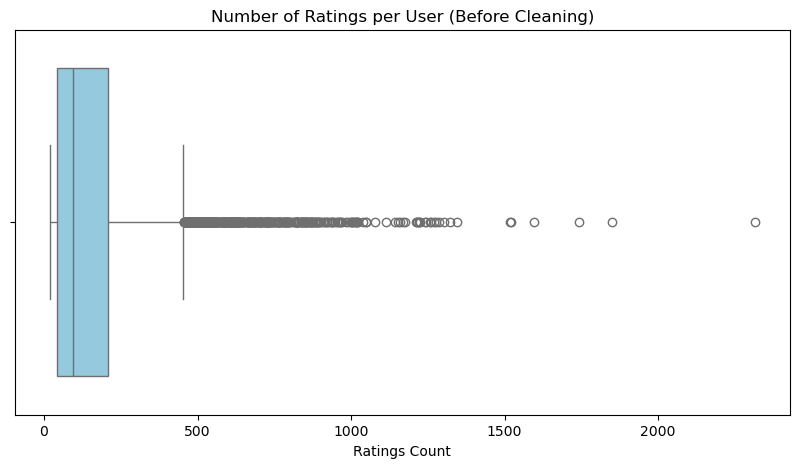

count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: count, dtype: float64


In [17]:
# Number of ratings per user
user_rating_counts = full_data['userId'].value_counts()

# Boxplot to visualize
plt.figure(figsize=(10,5))
sns.boxplot(x=user_rating_counts, color='skyblue')
plt.title('Number of Ratings per User (Before Cleaning)')
plt.xlabel('Ratings Count')
plt.show()

# Quick stats
print(user_rating_counts.describe())

In [19]:
# Define threshold (5x the 75th percentile- still preserves activr users)
user_threshold = 1000

# Filter users
valid_users = user_rating_counts[user_rating_counts < user_threshold].index
full_data = full_data[full_data['userId'].isin(valid_users)]

# Confirm
print(f"Users kept after trimming: {full_data['userId'].nunique()}")

Users kept after trimming: 5999


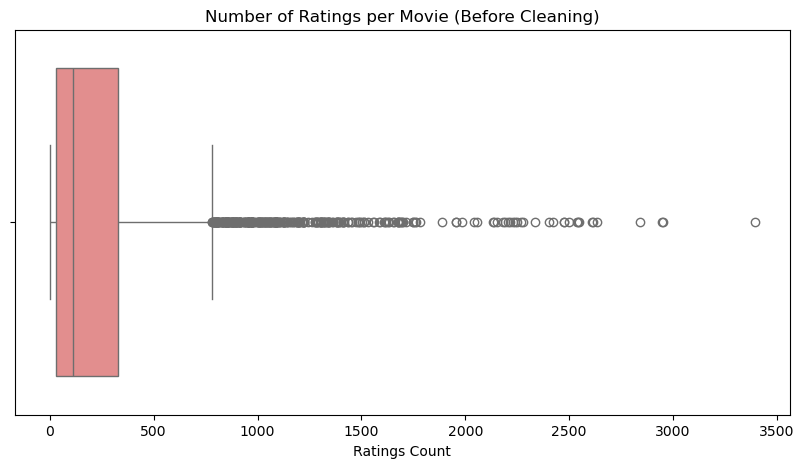

count    3691.000000
mean      257.197507
std       375.328811
min         1.000000
25%        29.000000
50%       113.000000
75%       329.000000
max      3393.000000
Name: count, dtype: float64


In [21]:
# Number of ratings per movie
movie_rating_counts = full_data['movieId'].value_counts()

# Boxplot to visualize
plt.figure(figsize=(10,5))
sns.boxplot(x=movie_rating_counts, color='lightcoral')
plt.title('Number of Ratings per Movie (Before Cleaning)')
plt.xlabel('Ratings Count')
plt.show()

# Quick stats
print(movie_rating_counts.describe())

In [23]:
# Define threshold (6x the 75th percentile- keeps most popular movies while removing blockbusters that would skew results)
movie_threshold = 2000

# Filter movies
valid_movies = movie_rating_counts[movie_rating_counts < movie_threshold].index
full_data = full_data[full_data['movieId'].isin(valid_movies)]

# Confirm
print(f"Movies kept after trimming: {full_data['movieId'].nunique()}")

Movies kept after trimming: 3661


implicit_feedback
1    57.516079
0    42.483921
Name: proportion, dtype: float64


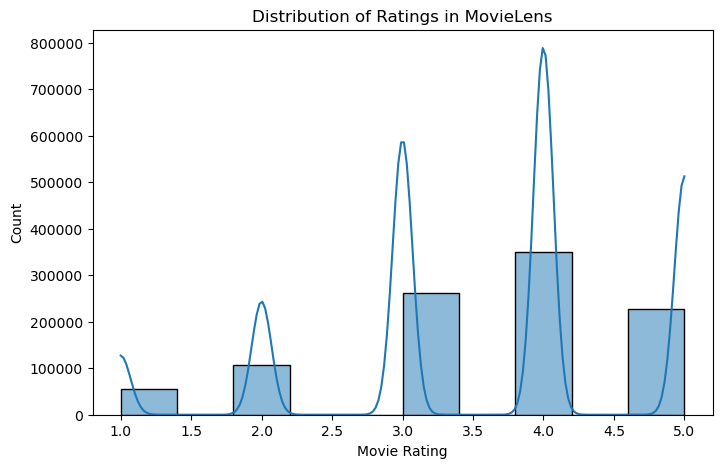

In [25]:
#Checking implicit ratings (if 90%+ feddback is "1", dataset may be unbalanced)
ratings["implicit_feedback"] = ratings["rating"].apply(lambda x: 1 if x >= 3.5 else 0)
print(ratings["implicit_feedback"].value_counts(normalize=True) * 100)

#Visualing rating distribution
plt.figure(figsize=(8,5))
sns.histplot(ratings["rating"], bins=10, kde=True)
plt.xlabel("Movie Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings in MovieLens")
plt.show()

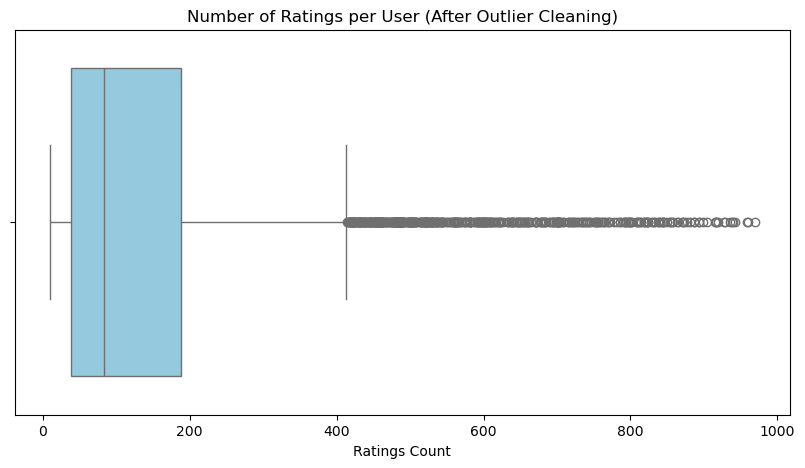

count    5999.000000
mean      146.109352
std       164.343443
min        10.000000
25%        38.000000
50%        83.000000
75%       188.000000
max       969.000000
Name: count, dtype: float64


In [26]:
# Updated Number of Ratings per User

user_rating_counts = full_data['userId'].value_counts()

plt.figure(figsize=(10,5))
sns.boxplot(x=user_rating_counts, color='skyblue')
plt.title('Number of Ratings per User (After Outlier Cleaning)')
plt.xlabel('Ratings Count')
plt.show()

print(user_rating_counts.describe())

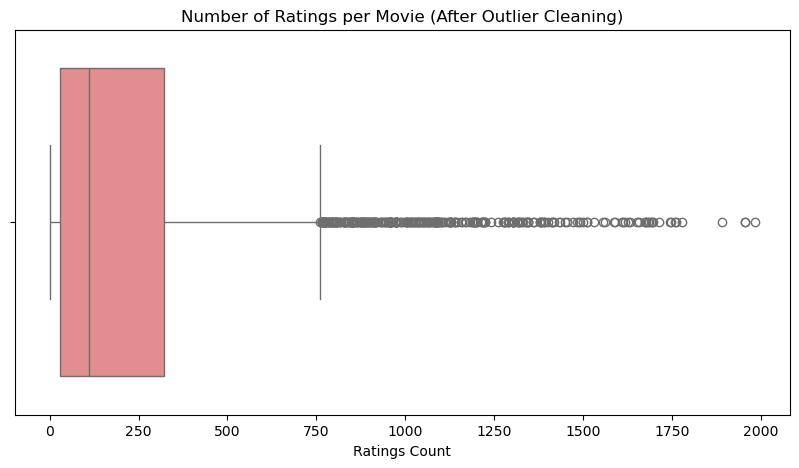

count    3661.000000
mean      239.418192
std       319.972342
min         1.000000
25%        28.000000
50%       111.000000
75%       321.000000
max      1983.000000
Name: count, dtype: float64


In [27]:
# Updated Number of Ratings per Movie

movie_rating_counts = full_data['movieId'].value_counts()

plt.figure(figsize=(10,5))
sns.boxplot(x=movie_rating_counts, color='lightcoral')
plt.title('Number of Ratings per Movie (After Outlier Cleaning)')
plt.xlabel('Ratings Count')
plt.show()

print(movie_rating_counts.describe())

In [31]:
#Checking how many ratings are between 1-2 to make sure we can simulate scrolling frustration
low_ratings = ratings[(ratings["rating"] >= 1.0) & (ratings["rating"] <= 2.0)]
low_rating_count = low_ratings.shape[0]
total_ratings_count = ratings.shape[0]
low_rating_percentage = (low_rating_count / total_ratings_count) * 100
print(f"Total Ratings: {total_ratings_count}")
print(f"Low Ratings (1-2): {low_rating_count}")
print(f"Percentage of Low Ratings: {low_rating_percentage:.2f}%")

Total Ratings: 1000209
Low Ratings (1-2): 163731
Percentage of Low Ratings: 16.37%


In [33]:
# Checking data sparcity (if very low (<1%), collaborative filtering may struggle)

# Low- 0.1-1%
# Moderate- 2-6%
# Dense- >10%

num_ratings = full_data.shape[0]
num_users = full_data['userId'].nunique()
num_movies = full_data['movieId'].nunique()
total_possible_ratings = num_users * num_movies

sparsity = (num_ratings / total_possible_ratings) * 100
print(f"Data Sparsity (After Cleaning): {sparsity:.5f}% (lower is typical for real-world recommenders)")

Data Sparsity (After Cleaning): 3.99097% (lower is typical for real-world recommenders)


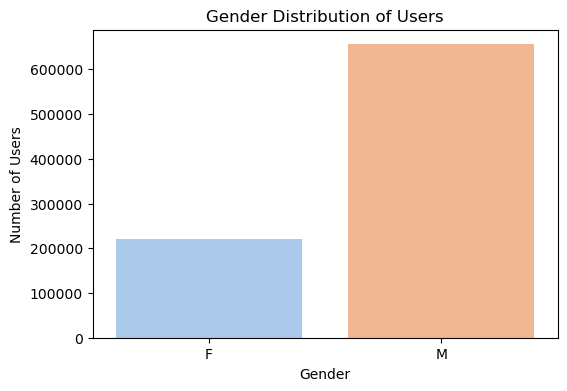

In [35]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=full_data, palette='pastel')
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

In [36]:
gender_rating_summary = full_data.groupby('gender')['rating'].mean().reset_index()
print(gender_rating_summary)

  gender    rating
0      F  3.590727
1      M  3.531440


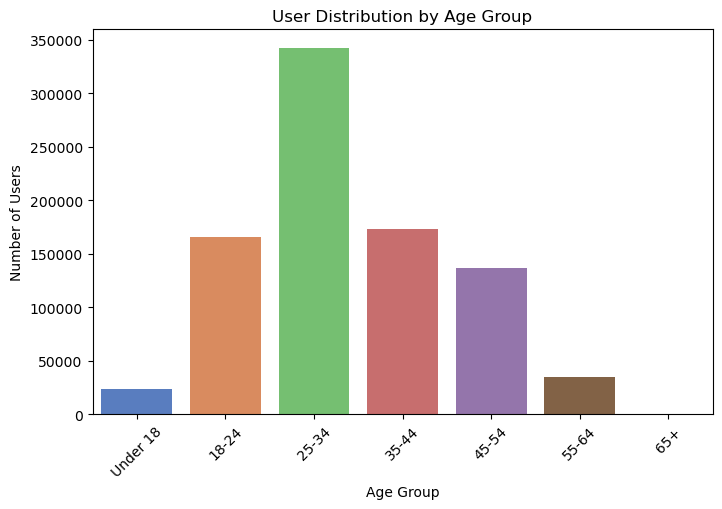

In [39]:
# Age group distribution
plt.figure(figsize=(8,5))
sns.countplot(x='age_group', data=full_data, order=['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'], palette='muted')
plt.title('User Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

In [41]:
agegroup_rating_summary = full_data.groupby('age_group')['rating'].mean().reset_index()
print(agegroup_rating_summary)

  age_group    rating
0  Under 18  3.506544
1     18-24  3.451202
2     25-34  3.503885
3     35-44  3.590161
4     45-54  3.664269
5     55-64  3.763859
6       65+       NaN


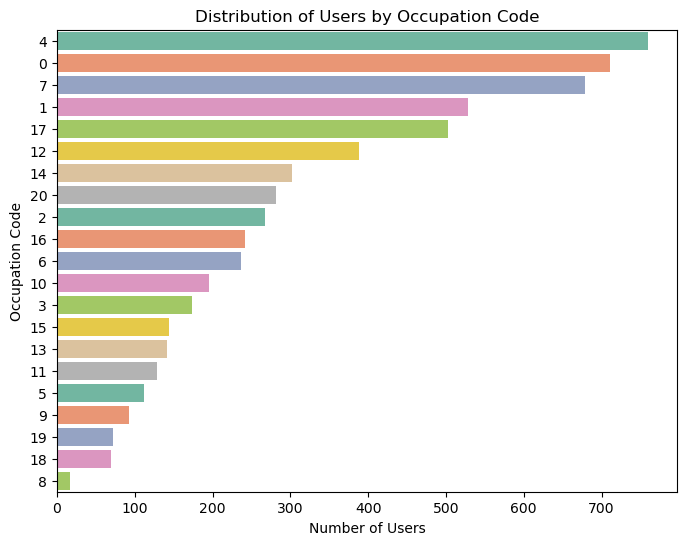

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(y='occupation', data=users, order=users['occupation'].value_counts().index, palette='Set2')
plt.title('Distribution of Users by Occupation Code')
plt.xlabel('Number of Users')
plt.ylabel('Occupation Code')
plt.show()

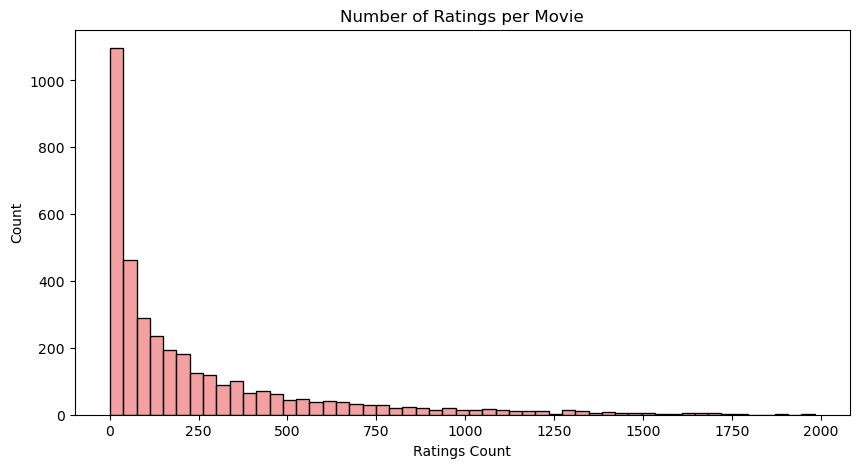

In [45]:
# Number of Ratings per Movie

movie_rating_counts = full_data['movieId'].value_counts()

plt.figure(figsize=(10,5))
sns.histplot(x=movie_rating_counts, color='lightcoral')
plt.title('Number of Ratings per Movie')
plt.xlabel('Ratings Count')
plt.show()

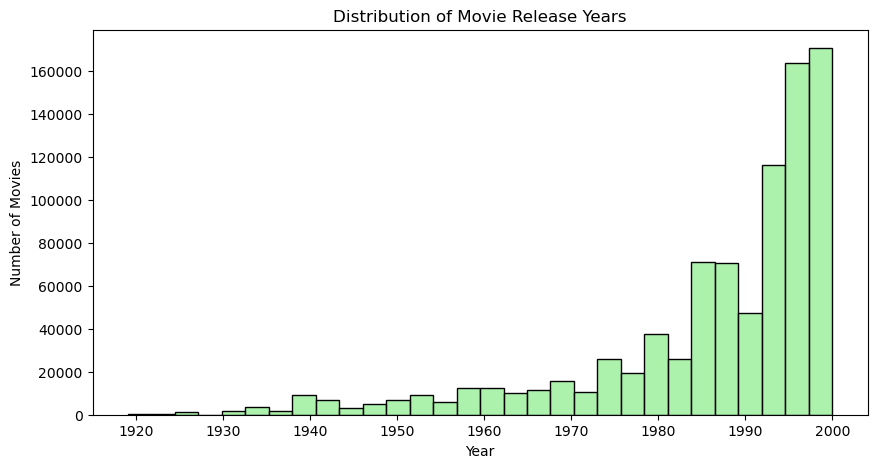

In [47]:
# Movie Release Year distribution

plt.figure(figsize=(10,5))
sns.histplot(full_data['year'].dropna().astype(int), bins=30, color='lightgreen')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

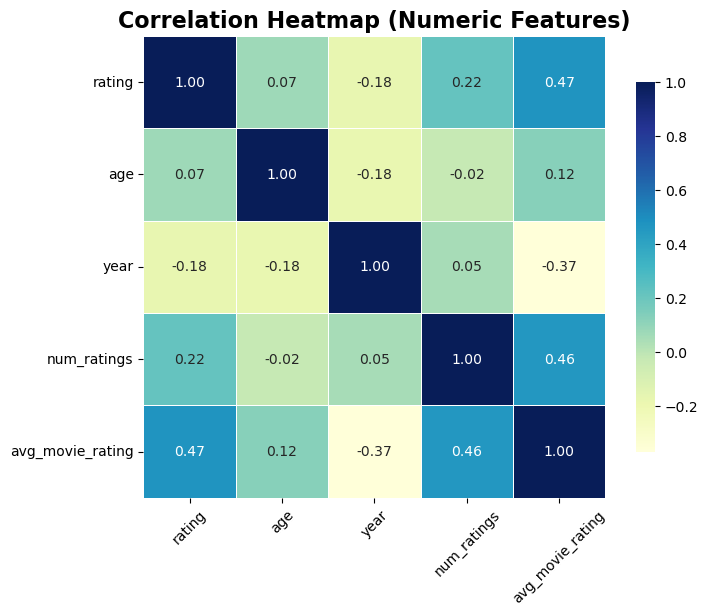

In [49]:
# For Heatmap, selecting only numeric columns for correlation (Leave out gender, occupation, age_group)

# Create new variables: number of ratings and average rating per movie
movie_stats = full_data.groupby('movieId')['rating'].agg(['count', 'mean']).rename(columns={'count':'num_ratings', 'mean':'avg_movie_rating'}).reset_index()

# Merge back into full_data
full_data = full_data.merge(movie_stats, on='movieId', how='left')

# Run heatmap code
corr_features = ['rating', 'age', 'year', 'num_ratings', 'avg_movie_rating']
corr_matrix = full_data[corr_features].corr()

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, 
            annot=True,            # show numbers
            fmt=".2f",              # format numbers to 2 decimal places
            cmap='YlGnBu',          # prettier color palette (yellow-green-blue)
            square=True,            # make heatmap squares
            cbar_kws={"shrink": 0.8}, # shrink color bar a little
            linewidths=0.5,         # light lines between squares
            linecolor='white')      # white gridlines
plt.title('Correlation Heatmap (Numeric Features)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [51]:
# One-hot encode categorical features
categorical_features = ['gender', 'age_group', 'occupation']

full_data = pd.get_dummies(full_data, columns=categorical_features, drop_first=True)

# Quick check
print(full_data.shape)
print(full_data.columns)

(876510, 56)
Index(['userId', 'movieId', 'rating', 'timestamp', 'age', 'zip_code', 'title',
       'genres', 'year', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'num_ratings', 'avg_movie_rating', 'gender_M',
       'age_group_18-24', 'age_group_25-34', 'age_group_35-44',
       'age_group_45-54', 'age_group_55-64', 'age_group_65+', 'occupation_1',
       'occupation_2', 'occupation_3', 'occupation_4', 'occupation_5',
       'occupation_6', 'occupation_7', 'occupation_8', 'occupation_9',
       'occupation_10', 'occupation_11', 'occupation_12', 'occupation_13',
       'occupation_14', 'occupation_15', 'occupation_16', 'occupation_17',
       'occupation_18', 'occupation_19', 'occupation_20'],
      dtype='object')


In [53]:
# Drop original raw categorical columns (already encoded into dummies)
full_data.drop(columns=['gender', 'occupation', 'age_group'], inplace=True, errors='ignore')

# Quick check
print(full_data.columns)

Index(['userId', 'movieId', 'rating', 'timestamp', 'age', 'zip_code', 'title',
       'genres', 'year', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'num_ratings', 'avg_movie_rating', 'gender_M',
       'age_group_18-24', 'age_group_25-34', 'age_group_35-44',
       'age_group_45-54', 'age_group_55-64', 'age_group_65+', 'occupation_1',
       'occupation_2', 'occupation_3', 'occupation_4', 'occupation_5',
       'occupation_6', 'occupation_7', 'occupation_8', 'occupation_9',
       'occupation_10', 'occupation_11', 'occupation_12', 'occupation_13',
       'occupation_14', 'occupation_15', 'occupation_16', 'occupation_17',
       'occupation_18', 'occupation_19', 'occupation_20'],
      dtype='object')


In [55]:
# Define X and y
X = full_data.drop(columns=['rating'])
y = full_data['rating']

# Quick check
print(X.shape, y.shape)

(876510, 55) (876510,)


In [65]:
# Final cleanup: Drop zip_code and other non-numerical or non-binary
full_data.drop(columns=['zip_code', 'timestamp', 'title', 'genres'], inplace=True, errors='ignore')

# Double-check data types
print(full_data.dtypes)

userId                int64
movieId               int64
rating                int64
age                   int64
year                  int64
Action                int64
Adventure             int64
Animation             int64
Children's            int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Fantasy               int64
Film-Noir             int64
Horror                int64
Musical               int64
Mystery               int64
Romance               int64
Sci-Fi                int64
Thriller              int64
War                   int64
Western               int64
num_ratings           int64
avg_movie_rating    float64
gender_M               bool
age_group_18-24        bool
age_group_25-34        bool
age_group_35-44        bool
age_group_45-54        bool
age_group_55-64        bool
age_group_65+          bool
occupation_1           bool
occupation_2           bool
occupation_3           bool
occupation_4        

In [67]:
from sklearn.preprocessing import StandardScaler

# Identify only numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Subset for scaling
X_train_numeric = X_train[numerical_cols]
X_test_numeric = X_test[numerical_cols]

# Scale only numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [69]:
# 1. Check if scaling output is NumPy array
print(f"X_train_scaled type: {type(X_train_scaled)}")

# 2. Check shape
print(f"X_train_scaled shape: {X_train_scaled.shape}")

# 3. Check for any missing values (NaNs)
print(f"Any NaNs in X_train_scaled? {np.isnan(X_train_scaled).any()}")

# 4. Quick look at basic stats
print("Scaled Feature Means (should be ~0):", X_train_scaled.mean(axis=0)[:5])
print("Scaled Feature Stds (should be ~1):", X_train_scaled.std(axis=0)[:5])

X_train_scaled type: <class 'numpy.ndarray'>
X_train_scaled shape: (701208, 25)
Any NaNs in X_train_scaled? False
Scaled Feature Means (should be ~0): [ 7.66570803e-17  6.45986632e-18 -3.20174281e-15 -9.29790092e-17
 -1.09957818e-15]
Scaled Feature Stds (should be ~1): [1. 1. 1. 1. 1.]


In [71]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

# Prepare data for Surprise library
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(full_data[['userId', 'movieId', 'rating']], reader)

# SVD Model
svd_model = SVD()

# 5-Fold Cross Validation
cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8887  0.8884  0.8857  0.8860  0.8857  0.8869  0.0014  
Fit time          4.07    3.66    3.66    3.44    3.27    3.62    0.27    
Test time         0.68    0.69    0.55    0.71    0.54    0.63    0.07    


{'test_rmse': array([0.88873498, 0.88841295, 0.8857124 , 0.88599687, 0.88570304]),
 'fit_time': (4.066644906997681,
  3.6556148529052734,
  3.6620450019836426,
  3.4439709186553955,
  3.26668381690979),
 'test_time': (0.6763451099395752,
  0.6908080577850342,
  0.5502529144287109,
  0.7118349075317383,
  0.5377862453460693)}

In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# KNN Model
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred_knn = knn_model.predict(X_test_scaled)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"KNN RMSE: {rmse_knn:.4f}")

KNN RMSE: 1.0165


In [75]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf:.4f}")

Random Forest RMSE: 0.9813


In [79]:
print(f"SVD Baseline RMSE: 0.8869")
print(f"KNN Regressor RMSE: {rmse_knn:.4f}")
print(f"Random Forest Regressor RMSE: {rmse_rf:.4f}")

SVD Baseline RMSE: 0.8869
KNN Regressor RMSE: 1.0165
Random Forest Regressor RMSE: 0.9813


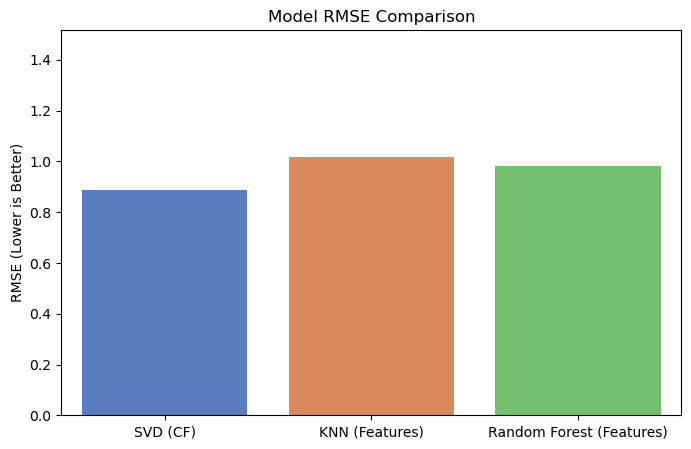

In [81]:
import matplotlib.pyplot as plt

models = ['SVD (CF)', 'KNN (Features)', 'Random Forest (Features)']
rmse_scores = [0.8869, rmse_knn, rmse_rf]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=rmse_scores, palette='muted')
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE (Lower is Better)')
plt.ylim(0, max(rmse_scores) + 0.5)
plt.show()

In [83]:
# Simulate scrolling behavior to validate whether scrolling frustration is reduced

import random

# Pick a random user from the dataset
user_ids = full_data['userId'].unique()
random_user = random.choice(user_ids)

print(f"Selected User ID: {random_user}")

Selected User ID: 1830


In [85]:
# See behavior without recommender

# Movies this user rated low (1 or 2 stars)
low_rated_movies = full_data[(full_data['userId'] == random_user) & (full_data['rating'] <= 2.0)]

# Count how many low ratings before finding a movie they liked (rating >=4)
liked_movies = full_data[(full_data['userId'] == random_user) & (full_data['rating'] >= 4.0)]

print(f"User {random_user} gave {low_rated_movies.shape[0]} low ratings before finding something they liked.")

User 1830 gave 2 low ratings before finding something they liked.


In [87]:
# Predict recommendations with SVD Model

# Build full trainset for surprise
trainset = data.build_full_trainset()
svd_model.fit(trainset)

# Predict top 10 recommendations
all_movie_ids = full_data['movieId'].unique()
user_seen_movies = full_data[full_data['userId'] == random_user]['movieId'].values

# Recommend movies the user hasn't rated yet
movies_to_predict = list(set(all_movie_ids) - set(user_seen_movies))

predictions = [svd_model.predict(random_user, movie_id) for movie_id in movies_to_predict]
predictions.sort(key=lambda x: x.est, reverse=True)

# Take top 10 predictions
top_10 = predictions[:10]

# Check if any would likely be liked (predicted rating >= 4.0)
good_recommendations = [pred for pred in top_10 if pred.est >= 4.0]

print(f"Model predicted {len(good_recommendations)} out of top 10 recommendations would be rated ≥ 4 by the user.")

Model predicted 10 out of top 10 recommendations would be rated ≥ 4 by the user.
